In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [23]:
df = pd.read_csv(r"Aemf1.csv",sep=',')
df.head(10)

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
5,Amsterdam,552.808567,Weekday,Private room,False,True,3.0,False,0,0,8.0,100.0,2,2.131420,1.904668,174.788957,9.255191,225.201662,15.692376
6,Amsterdam,215.124317,Weekday,Private room,False,True,2.0,False,0,0,10.0,94.0,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251
7,Amsterdam,2771.307384,Weekday,Entire home/apt,False,False,4.0,True,0,0,10.0,100.0,3,1.686807,1.458404,208.808109,11.056528,272.313823,18.975219
8,Amsterdam,1001.804420,Weekday,Entire home/apt,False,False,4.0,False,0,0,9.0,96.0,2,3.719141,1.196112,106.226456,5.624761,133.876202,9.328686
9,Amsterdam,276.521454,Weekday,Private room,False,True,2.0,False,1,0,10.0,88.0,1,3.142361,0.924404,206.252862,10.921226,238.291258,16.604478


In [24]:
df.shape

(41714, 19)

In [25]:
df["City"].unique()

array(['Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Budapest', 'Lisbon',
       'Paris', 'Rome', 'Vienna'], dtype=object)

In [26]:
city_mapping = {'Amsterdam': 0, 'Athens': 1, 'Barcelona': 2, 'Berlin': 3, 'Budapest': 4, 'Lisbon': 5, 'Paris': 6, 'Rome': 7, 'Vienna': 8}

df['City'] = df['City'].map(city_mapping)

df

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,0,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,0,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,0,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,0,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,0,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,8,715.938574,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,8,304.793960,Weekend,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,8,637.168969,Weekend,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,8,301.054157,Weekend,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


In [27]:
df["Day"].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [28]:
day_mapping = {'Weekday': 0, 'Weekend': 1}

df['Day'] = df['Day'].map(day_mapping)

df

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,0,194.033698,0,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,0,344.245776,0,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,0,264.101422,0,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,0,433.529398,0,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,0,485.552926,0,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,8,715.938574,1,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,8,304.793960,1,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,8,637.168969,1,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,8,301.054157,1,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


In [29]:
df["Room Type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [30]:
room_mapping = {'Private room': 0, 'Entire home/apt': 1, 'Shared room': 2}

df['Room Type'] = df['Room Type'].map(room_mapping)

df

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,0,194.033698,0,0,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,0,344.245776,0,0,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,0,264.101422,0,0,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,0,433.529398,0,0,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,0,485.552926,0,0,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,8,715.938574,1,1,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,8,304.793960,1,1,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,8,637.168969,1,1,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,8,301.054157,1,0,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


In [31]:
df["Shared Room"].unique()

array([False,  True])

In [32]:
S_room_mapping = {False: 0, True: 1}

df['Shared Room'] = df['Shared Room'].map(S_room_mapping)

df

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,0,194.033698,0,0,0,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,0,344.245776,0,0,0,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,0,264.101422,0,0,0,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,0,433.529398,0,0,0,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,0,485.552926,0,0,0,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,8,715.938574,1,1,0,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,8,304.793960,1,1,0,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,8,637.168969,1,1,0,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,8,301.054157,1,0,0,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


In [33]:
df["Private Room"].unique()

array([ True, False])

In [34]:
P_room_mapping = {False: 0, True: 1}

df['Private Room'] = df['Private Room'].map(P_room_mapping)

df

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,0,194.033698,0,0,0,1,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,0,344.245776,0,0,0,1,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,0,264.101422,0,0,0,1,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,0,433.529398,0,0,0,1,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,0,485.552926,0,0,0,1,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,8,715.938574,1,1,0,0,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,8,304.793960,1,1,0,0,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,8,637.168969,1,1,0,0,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,8,301.054157,1,0,0,1,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


In [36]:
df["Superhost"].unique()

array([False,  True])

In [37]:
superhost_mapping = {False: 0, True: 1}

df['Superhost'] = df['Superhost'].map(superhost_mapping)

df

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,0,194.033698,0,0,0,1,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,0,344.245776,0,0,0,1,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,0,264.101422,0,0,0,1,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,0,433.529398,0,0,0,1,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,0,485.552926,0,0,0,1,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,8,715.938574,1,1,0,0,6.0,0,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,8,304.793960,1,1,0,0,2.0,0,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,8,637.168969,1,1,0,0,2.0,0,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,8,301.054157,1,0,0,1,2.0,0,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


In [38]:
normalized_df=(df-df.mean())/df.std()
normalized_df.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,-1.923742,-0.236431,-0.998599,-1.450684,-0.087367,1.47512,-0.952115,-0.622826,1.544877,-0.719621,0.627242,-0.012673,-0.260029,1.173531,2.740643,-0.912897,-0.901397,-1.014970,-1.012039
1,-1.923742,0.301177,-0.998599,-1.450684,-0.087367,1.47512,0.586987,-0.622826,-0.647285,-0.719621,-1.622039,-0.995263,-0.260029,-1.097521,-0.516162,1.430627,2.589943,0.404476,1.773876
2,-1.923742,0.014341,-0.998599,-1.450684,-0.087367,1.47512,-0.952115,-0.622826,-0.647285,1.389588,-0.497399,-0.749616,-0.260029,1.536808,4.315595,-0.927381,-0.922974,-1.020476,-1.022847
3,-1.923742,0.620722,-0.998599,-1.450684,-0.087367,1.47512,0.586987,-0.622826,-0.647285,1.389588,-0.497399,-0.381144,1.306984,-1.149371,-0.232290,0.845669,1.718484,0.476986,1.916191
4,-1.923742,0.806914,-0.998599,-1.450684,-0.087367,1.47512,-0.952115,1.605545,-0.647285,-0.719621,0.627242,0.601446,-0.260029,-1.069300,-0.403888,1.098300,2.094849,0.362268,1.691037


In [143]:
normalized_df.corr()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
City,1.000000,-0.040205,0.025040,0.031929,-0.002339,-0.033263,0.021462,-0.058947,0.021014,0.037163,-0.032338,-0.060624,-0.055678,0.126002,-0.019203,0.208367,0.020923,0.353688,0.103578
Price,-0.040205,1.000000,0.011076,0.138662,-0.038231,-0.149694,0.179969,-0.040391,-0.055322,0.014206,0.003987,0.016069,0.206687,-0.052462,-0.038989,0.168785,0.270958,0.113171,0.219385
Day,0.025040,0.011076,1.000000,0.012660,0.000674,-0.012890,-0.010852,-0.008162,-0.007876,-0.007191,0.001042,0.002079,-0.014214,-0.001331,-0.011634,0.003292,0.009116,0.005280,-0.034969
Room Type,0.031929,0.138662,0.012660,1.000000,0.239191,-0.983435,0.470456,0.048510,-0.146288,0.032218,0.016829,0.044845,0.134451,-0.125829,-0.034394,-0.009707,0.000514,-0.012434,0.072579
Shared Room,-0.002339,-0.038231,0.000674,0.239191,1.000000,-0.059227,0.042136,-0.032852,-0.018975,0.057259,-0.049365,-0.035134,-0.022719,0.020506,-0.016123,-0.034541,0.000095,-0.033135,0.003528
Private Room,-0.033263,-0.149694,-0.012890,-0.983435,-0.059227,1.000000,-0.475804,-0.056006,0.146854,-0.022433,-0.026518,-0.052664,-0.142468,0.133191,0.032350,0.003532,-0.000511,0.006598,-0.073959
Person Capacity,0.021462,0.179969,-0.010852,0.470456,0.042136,-0.475804,1.000000,0.036633,-0.058319,0.099836,0.010089,0.017348,0.559161,-0.077547,0.008423,0.013310,-0.052291,0.021888,-0.010956
Superhost,-0.058947,-0.040391,-0.008162,0.048510,-0.032852,-0.056006,0.036633,1.000000,0.087061,-0.091925,0.279584,0.292312,0.023717,-0.024647,0.014925,-0.022746,-0.056138,-0.033509,-0.058594
Multiple Rooms,0.021014,-0.055322,-0.007876,-0.146288,-0.018975,0.146854,-0.058319,0.087061,1.000000,-0.465811,0.033897,0.040208,-0.005096,0.032846,0.035222,0.022380,-0.021696,0.024141,-0.043169
Business,0.037163,0.014206,-0.007191,0.032218,0.057259,-0.022433,0.099836,-0.091925,-0.465811,1.000000,-0.076511,-0.178954,-0.022079,-0.181273,-0.066284,0.087144,0.020663,0.113270,0.089935


In [83]:
X = normalized_df.drop("Price", axis=1)
y = normalized_df["Price"]

print(X.shape)
print(y.shape)

(41714, 18)
(41714,)


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33371, 18)
(8343, 18)
(33371,)
(8343,)


In [110]:
n_neighbors = 3

knn = KNeighborsRegressor(n_neighbors)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [111]:
y_pred = knn.predict(X_test)
print(y_pred)

[-0.42346097 -0.11278848  0.22492542 ... -0.01559271 -0.23368567
 -0.23104785]


In [113]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R cuadrado):", r2)

Error cuadrático medio (MSE): 0.8655938881518397
Coeficiente de determinación (R cuadrado): 0.21974730017764998


In [150]:
reduced_df = normalized_df[["Room Type", "Private Room", "Person Capacity", "Bedrooms", "Normalised Attraction Index", "Normalised Restraunt Index", "Price"]]
reduced_df

,Room Type,Private Room,Person Capacity,Bedrooms,Normalised Attraction Index,Normalised Restraunt Index,Price
0,-1.450684,1.475120,-0.952115,-0.260029,-0.901397,-1.012039,-0.236431
1,-1.450684,1.475120,0.586987,-0.260029,2.589943,1.773876,0.301177
2,-1.450684,1.475120,-0.952115,-0.260029,-0.922974,-1.022847,0.014341
3,-1.450684,1.475120,0.586987,1.306984,1.718484,1.916191,0.620722
4,-1.450684,1.475120,-0.952115,-0.260029,2.094849,1.691037,0.806914
...,...,...,...,...,...,...,...
41709,0.643510,-0.677895,2.126089,2.873997,0.476480,-0.808729,1.631461
41710,0.643510,-0.677895,-0.952115,-0.260029,0.353132,-0.935005,0.159979
41711,0.643510,-0.677895,-0.952115,-0.260029,0.046337,-1.013310,1.349546
41712,-1.450684,1.475120,-0.952115,-0.260029,-0.465065,-1.175097,0.146594


In [151]:
X2 = reduced_df.drop("Price", axis=1)
y2 = reduced_df["Price"]

print(X2.shape)
print(y2.shape)

(41714, 6)
(41714,)


In [152]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(33371, 6)
(8343, 6)
(33371,)
(8343,)


In [153]:
n_neighbors = 1

knn = KNeighborsRegressor(n_neighbors)
knn.fit(X2_train, y2_train)

KNeighborsRegressor(n_neighbors=1)

In [154]:
y2_pred = knn.predict(X2_test)
print(y2_pred)

[-0.15447621  0.25680539  0.17846518 ... -0.09739807  0.05040516
  0.32172106]


In [155]:
from sklearn.metrics import mean_squared_error, r2_score

mse_2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R cuadrado):", r2)

Error cuadrático medio (MSE): 0.8655938881518397
Coeficiente de determinación (R cuadrado): 0.21974730017764998


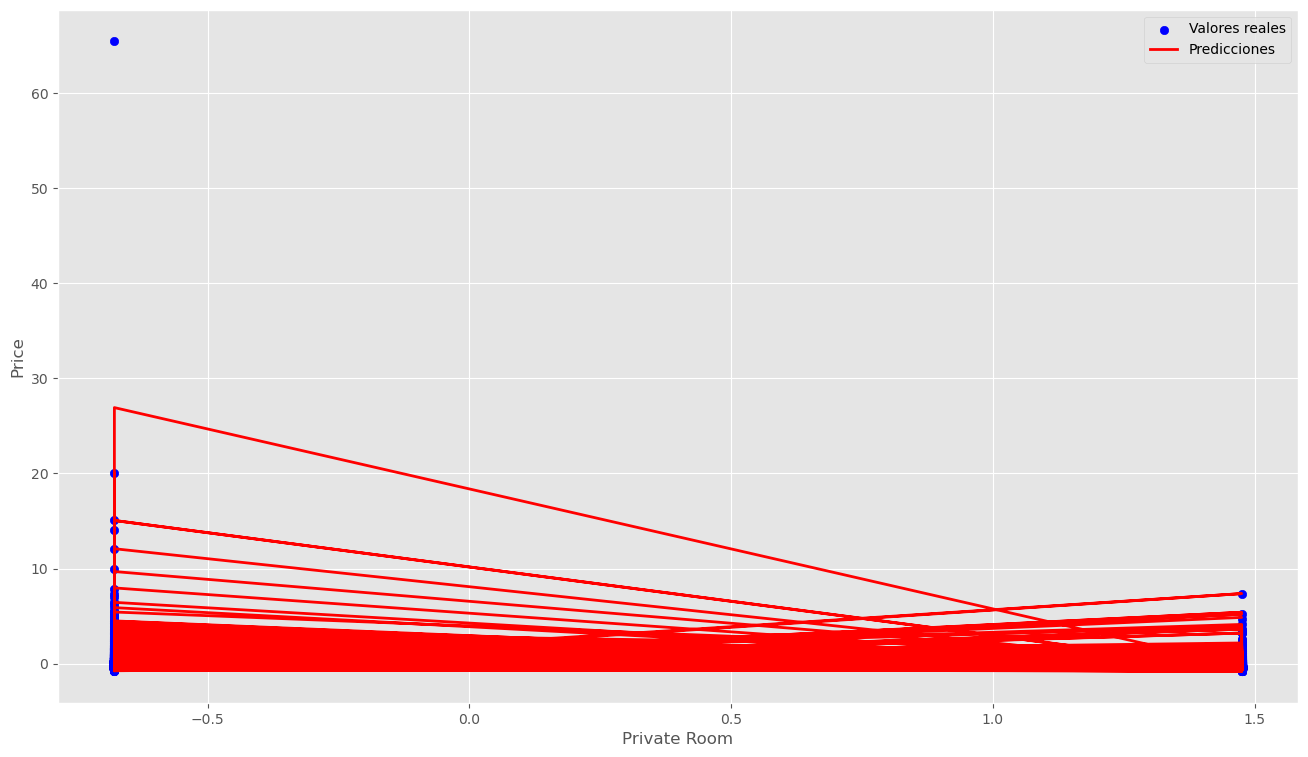

In [141]:
plt.scatter(X2_test["Private Room"], y2_test, color='blue', label='Valores reales')
plt.plot(X2_test["Private Room"], y2_pred, color='red', linewidth=2, label='Predicciones')
plt.xlabel('Private Room')
plt.ylabel('Price')
plt.legend()
plt.show()

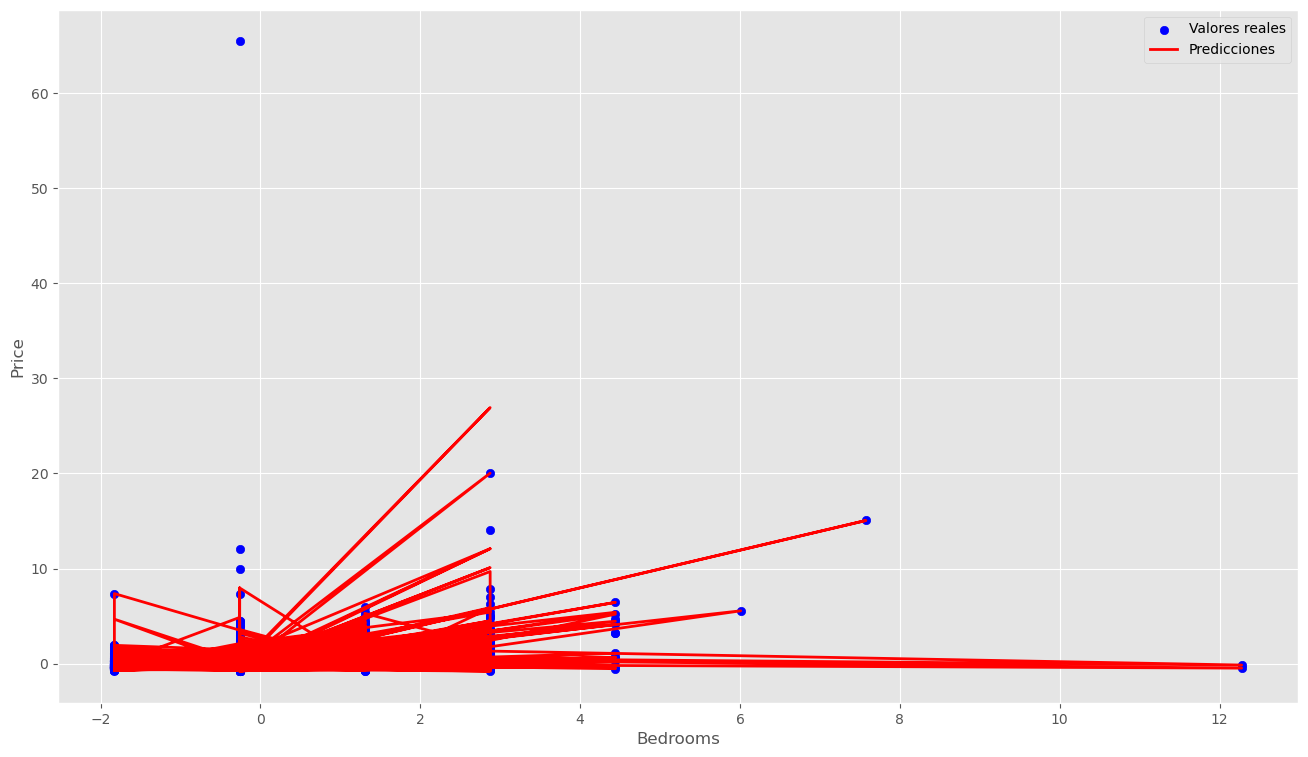

In [142]:
plt.scatter(X2_test["Bedrooms"], y2_test, color='blue', label='Valores reales')
plt.plot(X2_test["Bedrooms"], y2_pred, color='red', linewidth=2, label='Predicciones')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.legend()
plt.show()